In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.optimizers import SGD, Adam, RMSprop
import cv2

In [2]:

additional_y = np.array([0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3] 
                        + [1,2,3,4,5,0,6,7,8,9,0,1,3,4,5,6,7,2,8,9,0,1,2,3,4,5,6,7,8,9,1,2,5,0,3,4,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3] 
                        + [4,5,0,1,2,3,0,1,7,8,9,6,5,6,7,2,3,4,2,3,9,0,1,8,8,9,4,5,6,7,4,5,0,1,2,3,1,7,8,9,0,6,7,3,4,5,6,2,3,9,0,1,2,8,8,9,4,5,6,7,4,5,1,2,3,0,9,0,1,6,7,8,6,7,2,3,4,5,3,9,0,1,2,8,8,9,4,5,6,7,2,3,4,5,0,1,8,9,0,1,6,7,4,5,6,7,2,3,3,8,9,0,1,2]
                        + [3,4,5,0,1,2,9,0,1,7,8,6,4,5,6,7,2,3,2,3,9,0,1,8,8,9,5,6,7,4,2,3,4,5,0,1,1,8,9,0,6,7,7,4,5,6,2,3,3,9,0,1,2,8,9,5,6,7,8,4,1,2,3,4,5,0,9,0,1,6,7,8,7,3,4,5,6,2,0,1,2,3,8,9,9,4,5,6,7,8,2,3,4,5,0,1,9,0,1,6,7,8,7,2,3,4,5,6,9,0,1,2,3,8]
                        + [1,2,3,4,5,0,7,8,9,0,1,6,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,7,8,9,0,1,6,3,4,5,6,7,2,1,3,8,9,0,2,5,6,7,8,9,4,0,1,2,3,4,5,7,8,9,0,1,6,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,7,8,9,0,1,6,2,3,4,5,6,7,8,9,0,1,2,3]
                        + [0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3]
                        + [1,2,3,4,5,0,7,8,9,0,1,6,4,5,6,7,2,3,1,2,3,8,9,0,8,9,4,5,6,7,5,0,1,2,3,4,6,7,8,9,0,1,3,4,5,6,7,2,9,0,1,2,3,8,5,6,7,8,9,4,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,3,8,9,0,1,2,5,6,7,8,9,4,1,2,3,4,5,0,8,9,0,1,6,7,2,3,4,5,6,7,3,8,9,0,1,2]
                        + [0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3]
                        + [0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3]
                        + [2,3,4,5,0,1,0,1,6,7,8,9,4,5,6,7,2,3,2,3,8,9,0,1,7,8,9,4,5,6,3,4,5,0,1,2,1,6,7,8,9,0,2,3,4,5,6,7,9,0,1,2,3,8,9,8,4,5,6,7,0,1,2,3,4,5,1,6,7,8,9,0,7,2,3,4,5,6,8,9,0,1,2,3,8,9,4,5,6,7,1,2,3,4,5,0,7,8,9,0,1,6,4,5,6,7,2,3,8,9,0,1,2,3])

additional_y = additional_y.astype(np.uint8)

In [ ]:
for x in additional_y:
    print(x)

In [3]:
directory = "C:/Users/Aimee Simons/Desktop/2024/Lectures/Semester 1/EEE4114F/Project"

In [4]:
i=0
additional_x = np.empty((1140,28,28), dtype=np.uint8)
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if os.path.isdir(filepath) and "additional_x" in filepath:
        items = sorted(os.listdir(filepath), key=lambda x: int(x.split('.')[0]))
        for item in items:
            img_paths = os.path.join(filepath,item)
            img= cv2.imread(img_paths)[:,:,0] 
            additional_x[i] = img
            i+=1


In [ ]:
for i in range(1140):
    plt.imshow(additional_x[i])
    plt.title(additional_y[i])
    plt.show()

In [5]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test)= mnist.load_data()

In [6]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
additional_x = tf.keras.utils.normalize(additional_x, axis=1)
additional_y = tf.keras.utils.to_categorical(additional_y, 10)

Epoch 1/25
1500/1500 [==============================] - 6s 3ms/step - loss: 2.3021 - accuracy: 0.1065 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3024 - accuracy: 0.1062 - val_loss: 2.3025 - val_accuracy: 0.1009
Epoch 3/25
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3023 - accuracy: 0.1039 - val_loss: 2.3022 - val_accuracy: 0.1010
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3023 - accuracy: 0.1055 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 5/25
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3023 - accuracy: 0.1067 - val_loss: 2.3025 - val_accuracy: 0.1028
Epoch 6/25
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3023 - accuracy: 0.1043 - val_loss: 2.3023 - val_accuracy: 0.1135
Epoch 7/25
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3023 - accuracy: 0.1056 - val_loss: 2.3021 - val_accuracy:

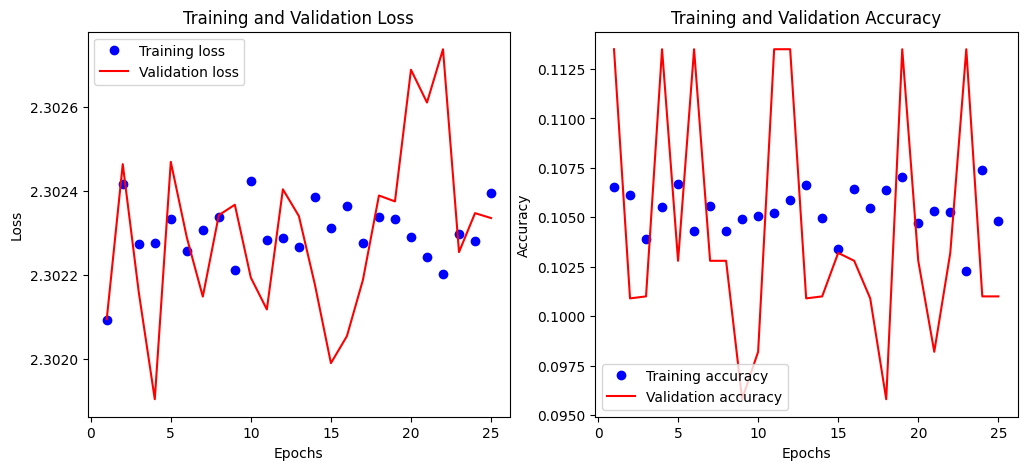

INFO:tensorflow:Assets written to: Models/RMS_batch40_epoch25_learning_rate_0.09_decay0.65_epsilon5e-1_.model\assets


INFO:tensorflow:Assets written to: Models/RMS_batch40_epoch25_learning_rate_0.09_decay0.65_epsilon5e-1_.model\assets


In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,input_shape=(784,), activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.09,weight_decay=0.65, epsilon=5e-01)
model.compile(optimizer= optimizer, loss= 'categorical_crossentropy', metrics=['accuracy'])
# model.summary()


batch_size = 40
history = model.fit(x_train, y_train,batch_size=batch_size, epochs=25, validation_data=(x_test, y_test))
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy'] 
epochs = range(1, len(train_accuracy) + 1)

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Save the model
model.save('Models/RMS_batch40_epoch25_learning_rate_0.09_decay0.65_epsilon5e-1_.model')

In [21]:
model = tf.keras.models.load_model('Models\SGD_batch64_epoch50_learning_rate_0.03_momentum0.8_.model')

In [20]:
i=0
file = open("modelTest.csv", "w+")
file.write("Model,Test Loss,Test Accuracy,Model Name\n")
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if os.path.isdir(filepath) and "Models" in filepath:
        items = os.listdir(filepath)
        for item in items:
            direct = os.path.join(filepath, item)
            model = tf.keras.models.load_model(direct)
            test_loss, test_acc = model.evaluate(additional_x,additional_y)
            file.write(f"{i+1},{test_loss},{test_acc},{item}\n")
            print('Test Loss: {}, Test Accuracy {}'.format(test_loss,test_acc))
            i= i + 1

file.close()


36/36 [==============================] - 0s 3ms/step - loss: 2.9916 - accuracy: 0.7868
Test Loss: 2.9916434288024902, Test Accuracy 0.7868421077728271
36/36 [==============================] - 0s 3ms/step - loss: 17.9903 - accuracy: 0.7912
Test Loss: 17.990293502807617, Test Accuracy 0.7912280559539795
36/36 [==============================] - 0s 3ms/step - loss: 46.0879 - accuracy: 0.7061
Test Loss: 46.087867736816406, Test Accuracy 0.7061403393745422
36/36 [==============================] - 0s 3ms/step - loss: 2.3842 - accuracy: 0.8079
Test Loss: 2.3842315673828125, Test Accuracy 0.807894766330719
36/36 [==============================] - 0s 3ms/step - loss: 2.0688 - accuracy: 0.1895
Test Loss: 2.0688161849975586, Test Accuracy 0.1894736886024475
36/36 [==============================] - 0s 3ms/step - loss: 12.2040 - accuracy: 0.7465
Test Loss: 12.203993797302246, Test Accuracy 0.7464912533760071
36/36 [==============================] - 0s 3ms/step - loss: 3.8595 - accuracy: 0.8193
Test 

36/36 [==============================] - 0s 3ms/step


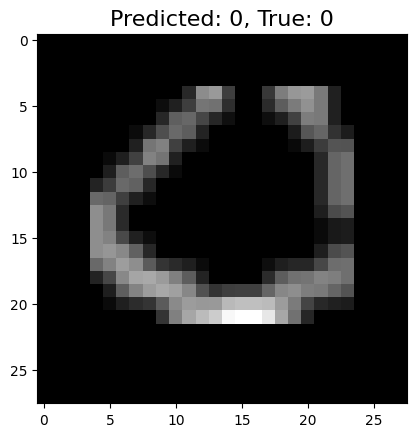

In [22]:
# test_loss, test_acc = model.evaluate(additional_x,additional_y)
# print('Test Loss: {}, Test Accuracy {}'.format(test_loss,test_acc))

y_pred = model.predict(additional_x)
y_pred_classes = np.argmax(y_pred,axis=1)
random_idx = np.random.choice(len(additional_x))
x_sample = additional_x[random_idx]
y_true = np.argmax(additional_y, axis = 1)
y_sample_true = y_true[random_idx]
y_sample_pred_class= y_pred_classes[random_idx]
plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true),fontsize = 16)
plt.imshow(x_sample, cmap='gray')


In [23]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

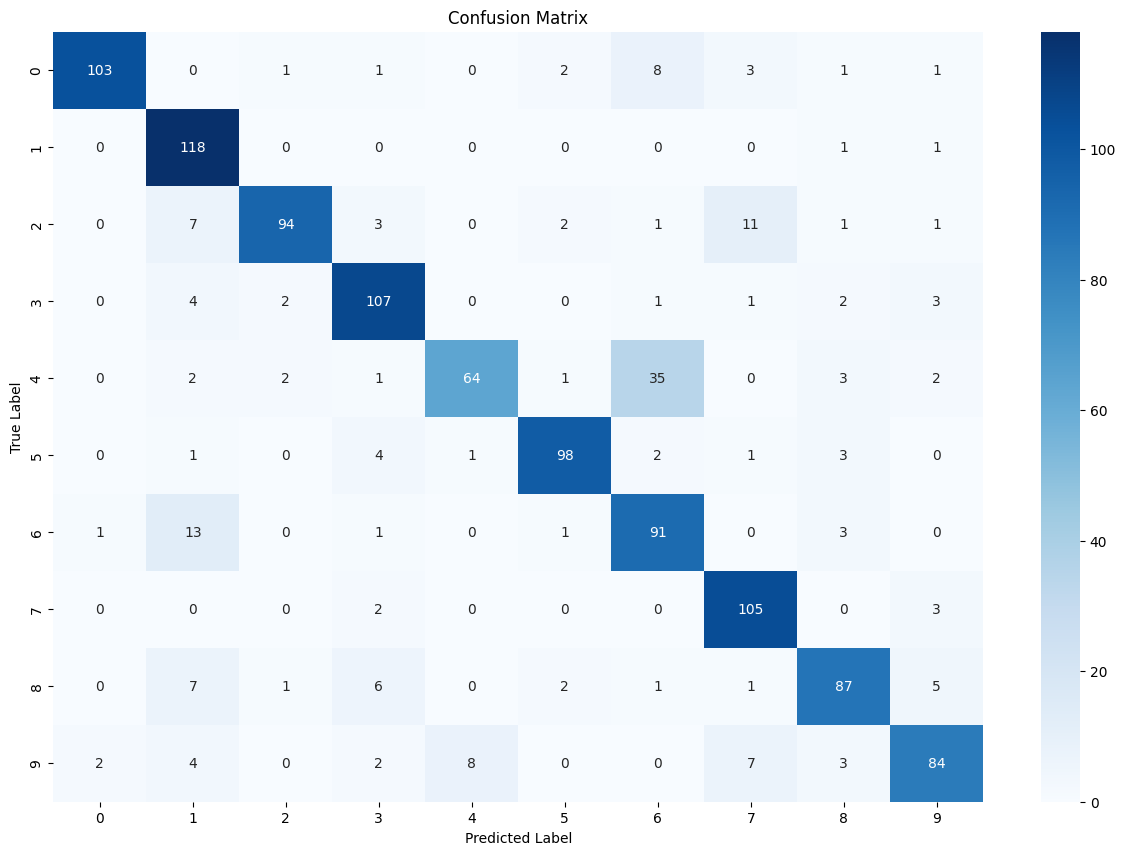

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot= True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title("Confusion Matrix");